# **Parametric Hypothesis Tests**

## **Assumptions for Choosing a Parametric Hypothesis Test**

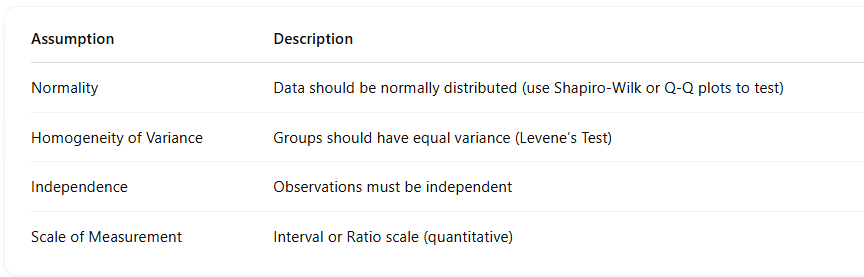

## **When to Perform which Parametrics Test?**

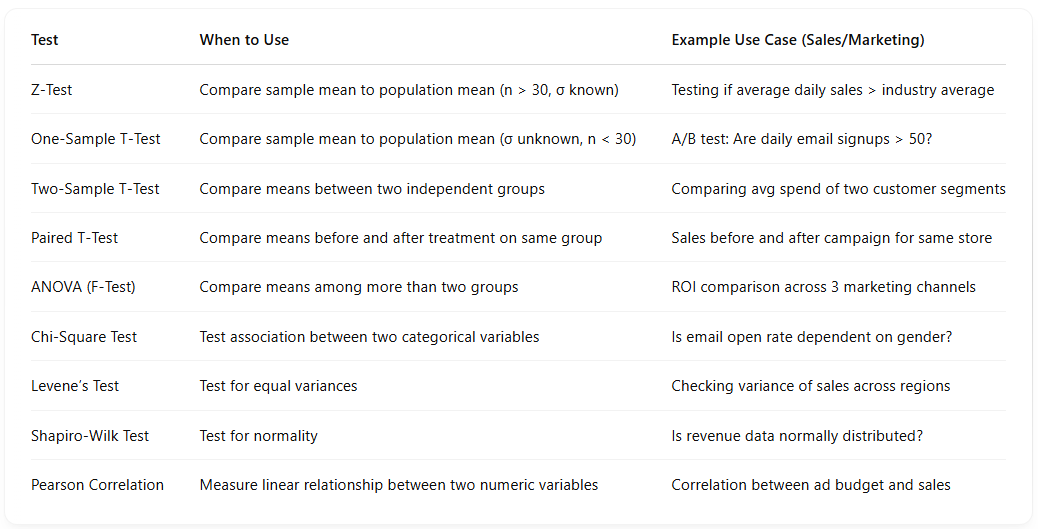

## **Generating Synthetic Data and Performing the Tests**

In [1]:
import pandas as pd
import numpy as np

# Sample Dataset
np.random.seed(25)
sales_data = pd.DataFrame({
    'region': np.random.choice(['Asia', 'Europe', 'Africa', 'America'], 360),  # Randomly assign one of four regions to 360 entries
    'campaign_type': np.random.choice(['Email', 'Social Media', 'TV'], 360),   # Randomly assign one of three campaign types to 360 entries
    'before_sales': np.random.normal(1500, 180, 360),                          # Generate 360 sales values before campaign from a normal distribution (mean=1500, std=180)
    'after_sales': np.random.normal(1600, 230, 360),                           # Generate 360 sales values after campaign (mean=1600, std=230)
    'email_open': np.random.choice(['Yes', 'No'], 360),                        # Randomly assign 'Yes' or 'No' to represent if email was opened
    'gender': np.random.choice(['Male', 'Female'], 360),                       # Randomly assign gender to each entry
    'ad_spend': np.random.normal(6000, 1700, 360),                             # Generate 360 values for ad spending (mean=6000, std=1700)
    'revenue': np.random.normal(6000, 2000, 360),                              # Generate 2360 revenue values (mean=6000, std=2000)
})

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         360 non-null    object 
 1   campaign_type  360 non-null    object 
 2   before_sales   360 non-null    float64
 3   after_sales    360 non-null    float64
 4   email_open     360 non-null    object 
 5   gender         360 non-null    object 
 6   ad_spend       360 non-null    float64
 7   revenue        360 non-null    float64
dtypes: float64(4), object(4)
memory usage: 22.6+ KB


In [ ]:
sales_data.head(10)

,region,campaign_type,before_sales,after_sales,email_open,gender,ad_spend,revenue
0,Asia,TV,1494.295891,1392.069120,Yes,Female,4298.238938,6172.473383
1,Africa,Social Media,1659.248330,1539.864780,No,Male,7959.060583,6948.287892
2,Africa,Social Media,1526.788627,1448.627764,No,Male,5110.376191,3251.825849
3,America,Social Media,1647.761507,1615.824768,No,Female,8419.209923,2283.542534
4,Europe,Email,1603.778732,1559.143292,Yes,Female,5535.276447,4100.265916
5,Africa,TV,1377.487658,1916.427606,Yes,Male,4156.858248,7274.638975
6,America,Email,1487.682383,1731.352822,Yes,Male,8210.361315,4352.948367
7,America,Social Media,1696.915276,1749.040744,No,Male,4711.328145,7520.432066
8,Asia,TV,1559.113156,1746.764741,No,Female,7249.894516,7976.272846
9,Africa,TV,1405.851853,1555.402662,Yes,Male,6644.806466,4761.705712


In [ ]:
# Saving the generated dataframe (optional)
sales_data.to_csv('sales_data.csv', index=False)
from google.colab import files
files.download('sales_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Checking group size
print(sales_data['region'].value_counts())

region
Africa     94
America    92
Asia       90
Europe     84
Name: count, dtype: int64


### **Shapiro-Wilk Test for Normality**

**When to Use:** Validate normality of a sample

**Hypotheses:**

Null Hypothesis (H₀): Data is normal

Alternative Hypothesis (H₁): Data is not normal

In [21]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Check if revenue is normally distributed
stat, p = shapiro(sales_data['revenue'])
print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("✔️ Likely normal (p > 0.05)")
else:
    print("❌ Not normal (p < 0.05)")

Shapiro-Wilk Test: Statistic=0.9959, p-value=0.4749
✔️ Likely normal (p > 0.05)


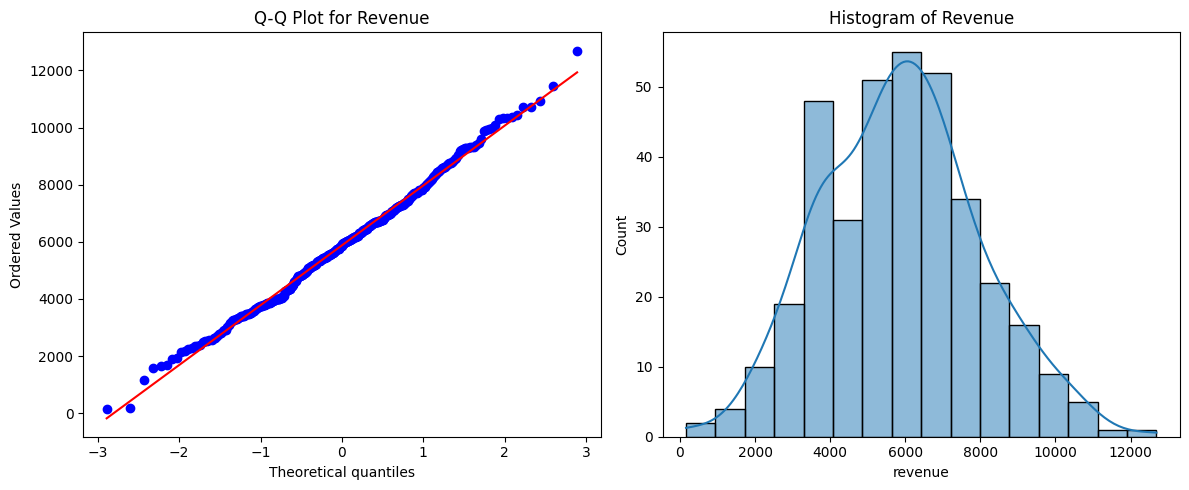

In [25]:
# Visualizing Normality
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q plot
stats.probplot(sales_data['revenue'], dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot for Revenue")

# Histogram
sns.histplot(sales_data['revenue'], kde=True, ax=axes[1])
axes[1].set_title("Histogram of Revenue")

plt.tight_layout()
plt.show()

**Since the p-value (0.4749) is significantly much higher than the common value of alpha  5%, we fail to reject the null hypothesis. Therefore, the data distribution is normal and it should be appropriate to conduct parametric tests for this scenario.**

###**Levene’s Test for Equal Variance [Homogeneity of Variance]**

**Hypotheses:**

**Null hypothesis (H₀):** All groups have equal variances in revenue.

**Alternative hypothesis (H₁):** At least one group has a different variance in revenue.

In [ ]:
from scipy.stats import levene

asia = sales_data[sales_data['region'] == 'Asia']['revenue']
africa = sales_data[sales_data['region'] == 'Africa']['revenue']
europe = sales_data[sales_data['region'] == 'Europe']['revenue']
america = sales_data[sales_data['region'] == 'America']['revenue']

stat, p = levene(asia, africa, europe, america)
print(f"Levene’s Test: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("✔️ Equal variance (p > 0.05)")
else:
    print("❌ Unequal variance (p < 0.05)")

Levene’s Test: Statistic=0.4064, p-value=0.7485
✔️ Equal variance (p > 0.05)


**The test output shows that the revenue variance is statistically equal across the four regions (p = 0.7485 > 0.05). This satisfies the assumption of homogeneity of variance, so we can safely proceed with statistical tests that assume equal variances.**

###**1. Two-Sample T-Test (Independent Groups)**

**When to Use:** Compare means of two independent groups (e.g., Region A vs Region B)

**Assumptions:**

✅ Data in both groups is normally distributed (Shapiro-Wilk)

✅ Equal variances (Levene's Test)

✅ Independent groups

**Hypotheses:**

H₀: μ₁ = μ₂ (no difference in means)

H₁: μ₁ ≠ μ₂ (means are different)


**Interpretation:**

If p < 0.05 → reject H₀ → there is a statistically significant difference in revenue between Asia and Europe.

In [22]:
from scipy.stats import ttest_ind

# Step 1: Checking normality

# Null Hypothesis (H₀)        : Data is normal
# Alternative Hypothesis (H₁) : Data is not normal

for region in ['Asia', 'Europe']:
    stat, p = shapiro(sales_data[sales_data['region'] == region]['revenue'])
    print(f"{region} Shapiro-Wilk p = {p:.4f}")
if p > 0.05:
    print("✔️ Likely normal (p > 0.05)")
else:
    print("❌ Not normal (p < 0.05)")

Asia Shapiro-Wilk p = 0.6832
Europe Shapiro-Wilk p = 0.9655
✔️ Likely normal (p > 0.05)


Asia Shapiro-Wilk p = 0.6832
✔️ Likely normal (p > 0.05)
Europe Shapiro-Wilk p = 0.9655
✔️ Likely normal (p > 0.05)


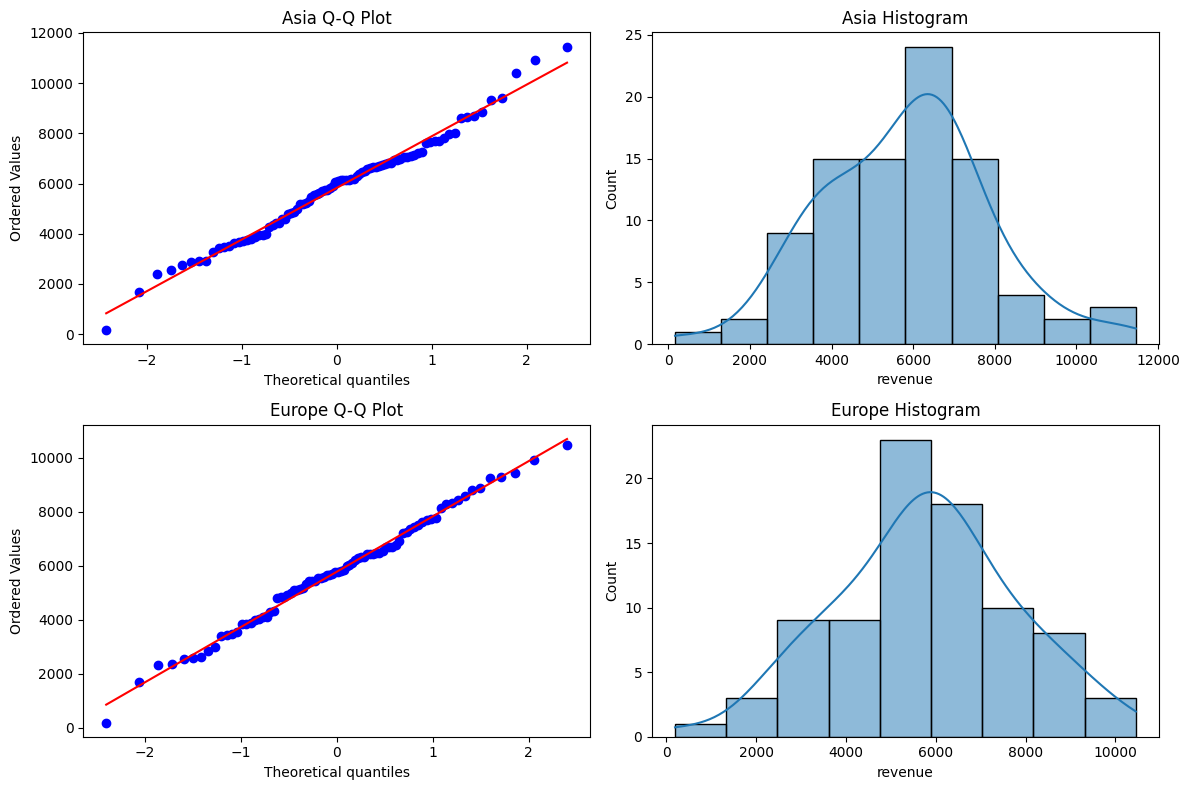

In [27]:
# Step 1.2: Visualizing Normality
from scipy.stats import shapiro, probplot
import matplotlib.pyplot as plt
import seaborn as sns

regions = ['Asia', 'Europe']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, region in enumerate(regions):
    data = sales_data[sales_data['region'] == region]['revenue'].dropna()
    stat, p = shapiro(data)
    print(f"{region} Shapiro-Wilk p = {p:.4f}")
    if p > 0.05:
        print("✔️ Likely normal (p > 0.05)")
    else:
        print("❌ Not normal (p < 0.05)")

    # Q-Q Plot
    probplot(data, dist="norm", plot=axes[i, 0])
    axes[i, 0].set_title(f"{region} Q-Q Plot")

    # Histogram
    sns.histplot(data, kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"{region} Histogram")

plt.tight_layout()
plt.show()


In [30]:
# Step 2: Checking variance equality
from scipy.stats import levene

# Null hypothesis (H₀)        : The two groups have equal variances in revenue.
# Alternative hypothesis (H₁) : The two groups have different variances in revenue.

asia = sales_data[sales_data['region'] == 'Asia']['revenue']
europe = sales_data[sales_data['region'] == 'Europe']['revenue']
stat, p = levene(asia, europe)
print(f"Levene’s p = {p:.4f}")
if p > 0.05:
    print("✔️ Equal variance (p > 0.05)")
else:
    print("❌ Unequal variance (p < 0.05)")

Levene’s p = 0.9437
✔️ Equal variance (p > 0.05)


In [ ]:
# Step 3: Performing t-test

# Null hypothesis (H₀)        : There is no significant difference in revenue between Asia and Europe (mean_Asia = mean_Europe).
# Alternative hypothesis (H₁) : There is a significant difference in revenue between Asia and Europe (mean_Asia ≠ mean_Europe).

stat, p = ttest_ind(asia, europe, equal_var=(p > 0.05))
print(f"t-test: Statistic = {stat:.4f}, p-value = {p:.4f}")

t-test: Statistic = 0.1628, p-value = 0.8708


**Since the p-value (0.8708) is significantly much higher than the common value of alpha 5%, we fail to reject the null hypothesis. Hence, there's no statistically significant difference in revenue between Asia and Europe.**

###**2. Paired T-Test (Before vs After Campaign)**

**When to Use:** Compare before/after sales in the same region

**Assumptions:**

- Normality of the differences

- Paired data (dependent samples)

**Hypotheses:**

H₀: μ₁ - μ₂ = 0

H₁: μ₁ - μ₂ ≠ 0

In [23]:
# Step 1: Checking Normality
from scipy.stats import shapiro

# Null Hypothesis (H₀)        : Data is normal
# Alternative Hypothesis (H₁) : Data is not normal

diff = sales_data['after_sales'] - sales_data['before_sales']
stat, p = shapiro(diff)
print(f"Shapiro-Wilk Test on Differences: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("✔️ Likely normal (p > 0.05)")
else:
    print("❌ Not normal (p < 0.05)")

Shapiro-Wilk Test on Differences: Statistic=0.9973, p-value=0.8144
✔️ Likely normal (p > 0.05)


Shapiro-Wilk Test on Differences: Statistic=0.9973, p-value=0.8144
✔️ Likely normal (p > 0.05)


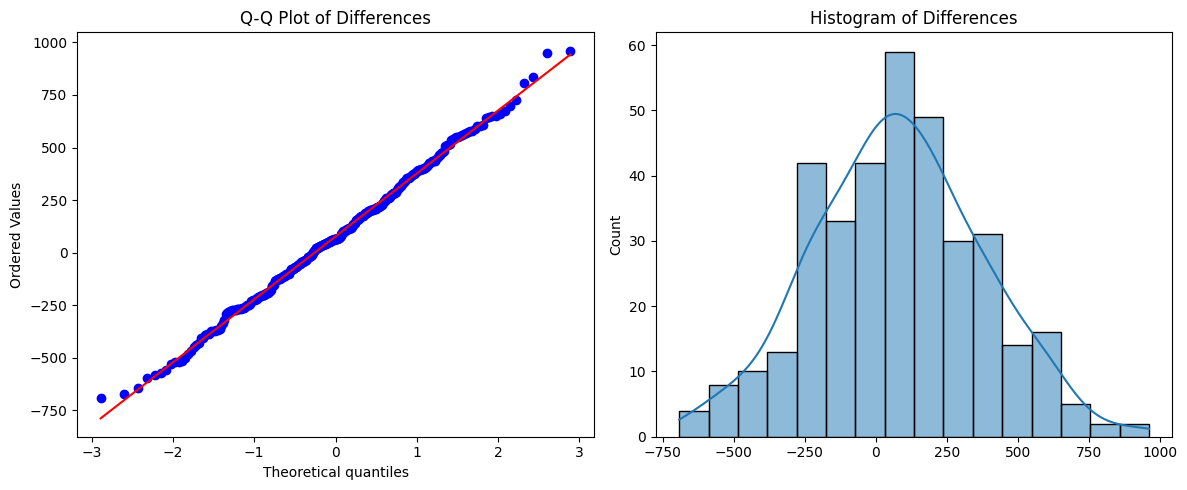

In [28]:
# Step 1.2: Visualizing Normality
from scipy.stats import shapiro, probplot
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the differences
diff = sales_data['after_sales'] - sales_data['before_sales']
stat, p = shapiro(diff.dropna())  # Ensure no NaN values
print(f"Shapiro-Wilk Test on Differences: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("✔️ Likely normal (p > 0.05)")
else:
    print("❌ Not normal (p < 0.05)")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q Plot
probplot(diff, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot of Differences")

# Histogram
sns.histplot(diff, kde=True, ax=axes[1])
axes[1].set_title("Histogram of Differences")

plt.tight_layout()
plt.show()

**Step 2: Checking if data is paired or not**

Our data satisfies this because each row in sales_data represents the same entity (e.g., a customer or campaign instance) measured twice: once before the campaign (before_sales) and once after (after_sales). Since both values belong to the same case, the data is paired or dependent.

In [ ]:
# Step 3: Running the paired T-Test
from scipy.stats import ttest_rel

# Null hypothesis (H₀)       : The mean before_sales equals after_sales (no effect from the campaign).
# Alternative hypothesis (H₁): The mean before_sales ≠ after_sales (campaign had an effect).

t_stat, p_val = ttest_rel(sales_data['before_sales'], sales_data['after_sales'])
print(f"Paired T-Test: t-stat={t_stat:.4f}, p-value={p_val:.10f}")

Paired T-Test: t-stat=-4.9111, p-value=0.0000013781


**Since the p-value of the paired (dependent samples) t-test is very less than 0.05 (0.000001) we can conclude that the test is sigficant at 5% level of significance. Thus the difference between the before and after sales of campaigns is significantly different, suggesting the campaign had an effect.**

###**3. ANOVA**

**When to Use:** Compare more than 2 groups (In this case, among 3 different campaign types)

**Assumptions:**

- Normality in all groups

- Equal variances

- Independence

**Hypotheses:**

H₀: All group means are equal

H₁: At least one differs

In [24]:
# Step 1.1: Checking Normality
from scipy.stats import shapiro

# Null Hypothesis (H₀)        : Data is normal
# Alternative Hypothesis (H₁) : Data is not normal

for campaign in ['Email', 'Social Media', 'TV']:
    group = sales_data[sales_data['campaign_type'] == campaign]['revenue']
    stat, p = shapiro(group)
    print(f"{campaign}: Shapiro-Wilk Test -> Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("✔️ Likely normal (p > 0.05)")
else:
    print("❌ Not normal (p < 0.05)")

Email: Shapiro-Wilk Test -> Statistic=0.9952, p-value=0.9560
Social Media: Shapiro-Wilk Test -> Statistic=0.9919, p-value=0.7076
TV: Shapiro-Wilk Test -> Statistic=0.9896, p-value=0.5158
✔️ Likely normal (p > 0.05)


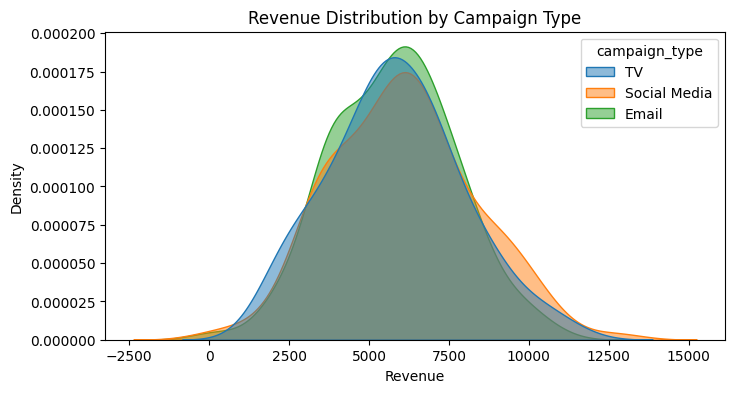

In [ ]:
# Step 1.2: Visualizing the normal distributions
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.kdeplot(data=sales_data, x='revenue', hue='campaign_type', fill=True, common_norm=False, alpha=0.5)
plt.title('Revenue Distribution by Campaign Type')
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.show()

In [31]:
#Step 2: Checking variance equality

# Null hypothesis (H₀)        : The three campaign types have equal variances in revenue.
# Alternative hypothesis (H₁) : The three camapign types have different variances in revenue.

from scipy.stats import levene

email = sales_data[sales_data['campaign_type'] == 'Email']['revenue']
social = sales_data[sales_data['campaign_type'] == 'Social Media']['revenue']
tv = sales_data[sales_data['campaign_type'] == 'TV']['revenue']

stat, p = levene(email, social, tv)
print(f"Levene’s Test: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("✔️ Equal variance (p > 0.05)")
else:
    print("❌ Unequal variance (p < 0.05)")

Levene’s Test: Statistic=0.8715, p-value=0.4192
✔️ Equal variance (p > 0.05)


In [ ]:
# Step 3-1: Running the ANOVA
from scipy.stats import f_oneway

email = sales_data[sales_data['campaign_type'] == 'Email']['revenue']
social = sales_data[sales_data['campaign_type'] == 'Social Media']['revenue']
tv = sales_data[sales_data['campaign_type'] == 'TV']['revenue']

f_stat, p_val = f_oneway(email, social, tv)
print(f"ANOVA: F-stat={f_stat:.4f}, p-value={p_val:.4f}")

ANOVA: F-stat=0.6812, p-value=0.5067


In [ ]:
# Step 3-2 Alternative Way of Running ANOVA (more dynamic):
from scipy.stats import f_oneway

grouped = sales_data.groupby('campaign_type')['revenue'].apply(list)
stat, p = f_oneway(*grouped)
print(f"ANOVA: Statistic = {stat:.4f}, p-value = {p:.4f}")

ANOVA: Statistic = 0.6812, p-value = 0.5067


**Since the p-value (0.5067) is higher than 0.05, we fail to reject the null hypothesis at 5% level of significance. Thus there's no statistically significant difference in revenue generated through Email, Social Media, and TV campaigns.**

###**4. Correlation Test**

In [ ]:
correlation_coefficient = sales_data['ad_spend'].corr(sales_data['revenue'])
correlation_coefficient

# CORRELATION values and their meanings
#  Close to -1 or +1    : Strong correlation
#  Close to -0.5 or +0.5: Moderately strong correlation
#  Close to 0           : Weak correlation

np.float64(-0.024498600890523508)

**In this case, the correlation coefficient implies a weak correlation between ad_spend and revenue. But to check the statistical significance behind it, we can conduct Pearson Correlation Test or Spearman Correlation Test**

### Pearson Correlation Test

**When to Use:** When measuring the strength and direction of a linear relationship between two continuous variables.

**Assumption:**
- Relationship between variables is linear
- Variables are normally distributed  
  
**Hypotheses:**

Null Hypothesis, H₀       : There is no linear correlation between the two variables (ρ = 0)  
Alternative Hypothesis, H₁: There is a linear correlation (ρ ≠ 0)

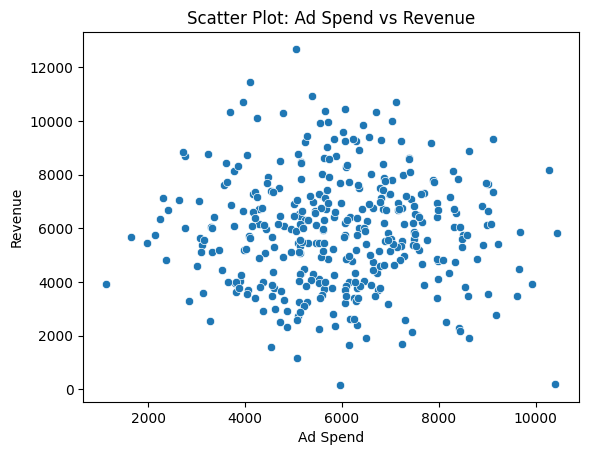

In [ ]:
# Step 1: Test of Linearity
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=sales_data, x='ad_spend', y='revenue')
plt.title('Scatter Plot: Ad Spend vs Revenue')
plt.xlabel('Ad Spend')
plt.ylabel('Revenue')
plt.show()

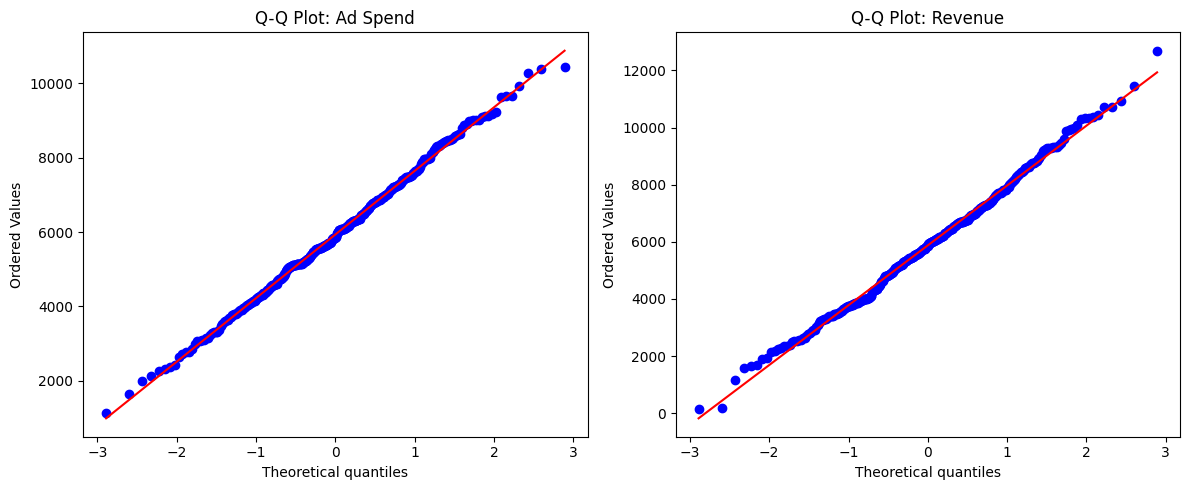

In [ ]:
# Step 2: Test of Bivariate Normality (Q-Q Plots on both Variables)
import scipy.stats as stats

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Q-Q Plot for ad_spend
stats.probplot(sales_data['ad_spend'], dist="norm", plot=axes[0])
axes[0].set_title('Q-Q Plot: Ad Spend')

# Q-Q Plot for revenue
stats.probplot(sales_data['revenue'], dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot: Revenue')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import pearsonr   # For less significant correlation (such as 0.33) we conduct Pearson test
corr, p_val = pearsonr(sales_data['ad_spend'], sales_data['revenue'])
print(f"Pearson Correlation: r={corr:.4f}, p-value={p_val:.4f}")

Pearson Correlation: r=-0.0245, p-value=0.6432


**Although at 5% level of significance, we fail to reject the null hypothesis, meaning that there is no linear correlation between ad_spend and revenue, the test is not very reliable since the scatter plot was not linear to begin with. In this scenario it would be more appropriate to conduct Spearman Correlation Test (shown under Non-Parametric Hypothesis Tests)**

# **Non-Parametric Hypothesis Tests**

##**When to Use Non-Parametrics Tests over Parametric Tests?**

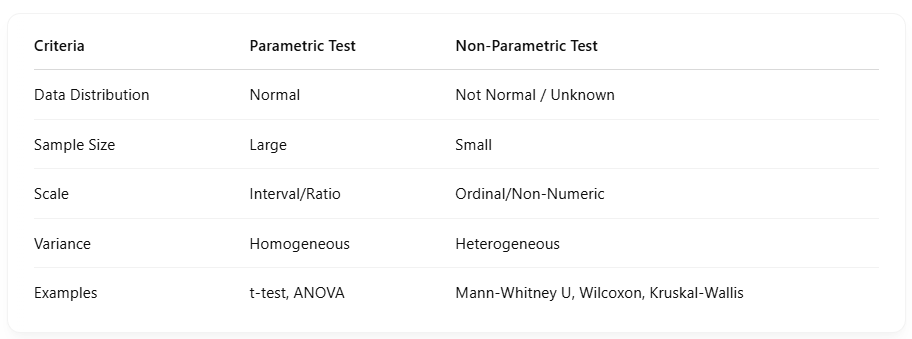

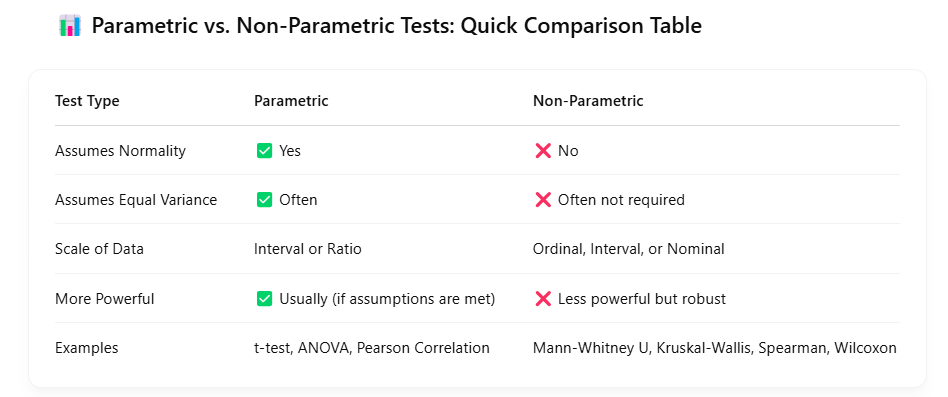

##**Non-Parametric Tests Overview**

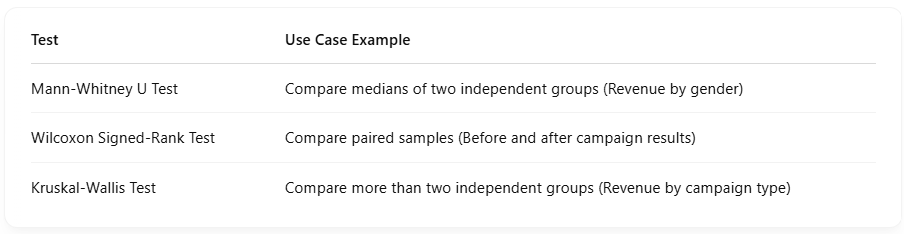

###**1. Mann-Whitney U Test (Non-parametric alternative to Two-Sample t-test)**

**When to Use:** Same goal as above, but normality not assumed

**Assumptions:**

- Ordinal or continuous scale

- Independent samples

**Hypotheses:**

H₀: Distributions are equal (no difference)

H₁: Distributions are different

In [4]:
from scipy.stats import mannwhitneyu

asia = sales_data[sales_data['region'] == 'Asia']['revenue']
europe = sales_data[sales_data['region'] == 'Europe']['revenue']

stat, p = mannwhitneyu(asia, europe, alternative='two-sided')
print(f"Mann-Whitney U: Statistic = {stat:.4f}, p-value = {p:.4f}")

Mann-Whitney U: Statistic = 3842.0000, p-value = 0.8531


**At 5% level of significance, we fail to reject the null hypothesis. Hence, there's no statistically significant difference in revenues between Asia and Europe.**

###**2. Wilcoxon Signed-Rank Test (Non-parametric paired test)**

**When to Use:** Same as paired t-test, but for non-normal differences

**Hypotheses:**  
**Null hypothesis (H₀)       :** The mean before_sales equals after_sales (no effect from the campaign).  
**Alternative hypothesis (H₁):** The mean before_sales ≠ after_sales (campaign had an effect).

In [6]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(sales_data['before_sales'], sales_data['after_sales'])
print(f"Wilcoxon Signed-Rank: Statistic = {stat:.4f}, p-value = {p:.10f}")

Wilcoxon Signed-Rank: Statistic = 23430.0000, p-value = 0.0000045348


**At 5% level of significance, we fail to reject the null hypothesis. Thus the difference between the before and after sales of campaigns is significantly different, suggesting the campaign had an effect.**

###**3. Kruskal-Wallis Test (Non-parametric ANOVA)**

**When to Use:** Compare more than 2 groups (In this case, among 3 different campaign types)

**Hypotheses:**

H₀: All group means are equal

H₁: At least one differs

In [8]:
from scipy.stats import kruskal

email = sales_data[sales_data['campaign_type'] == 'Email']['revenue']
social = sales_data[sales_data['campaign_type'] == 'Social Media']['revenue']
tv = sales_data[sales_data['campaign_type'] == 'TV']['revenue']

stat, p = kruskal(email, social, tv)
print(f"Kruskal-Wallis Test: Statistic={stat:.4f}, p-value={p:.4f}")

Kruskal-Wallis Test: Statistic=0.8631, p-value=0.6495


**At 5% level of confidence, we fail to reject the null hypothesis. Thus there's no statistically significant difference in revenue generated through Email, Social Media, and TV campaigns.**

### **4. Spearman Correlation Test**

**Hypotheses:**

**Null Hypothesis, H₀       :** There is no linear correlation between the two variables (ρ = 0)  
**Alternative Hypothesis, H₁:** There is a linear correlation (ρ ≠ 0)

In [9]:
from scipy.stats import spearmanr

# Spearman Correlation between ad_spend and revenue
corr, p_val = spearmanr(sales_data['ad_spend'], sales_data['revenue'])
print(f"Spearman Correlation: ρ={corr:.4f}, p-value={p_val:.4f}")

Spearman Correlation: ρ=0.0137, p-value=0.7951


**At 5% level of significance, we fail to reject the null hypothesis, meaning that there is no linear correlation between ad_spend and revenue**

### **5. Chi-Square Test of Independence**

**When to use:** To check if two categorical variables are associated (i.e., not independent).  
**Hypothesis:**  
**Null Hypothesis, H₀       :** The two categorical variables are independent (no association).  
**Alternative Hypothesis, H₁:** The two categorical variables are dependent (there is an association).

In [10]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(sales_data['gender'], sales_data['email_open'])
contingency

email_open,No,Yes
gender,,
Female,90,86
Male,84,100


In [11]:
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-Square: χ²={chi2:.4f}, p-value={p:.4f}")

Chi-Square: χ²=0.8749, p-value=0.3496


**At 5% level of significance, we fail to reject the null hypothesis. Hence, there is no significant association between gender and email open rate — they appear to be independent.**

### **6. Chi-Square Goodness of Fit Test**

**When to Use:** Does observed frequency differ from expected?

It is used to determine if there's a significant difference between observed data and expected data when dealing with categorical variables.


**Hypotheses:**

H₀: Observed = Expected

H₁: Observed ≠ Expected

In [12]:
# Count number of subjects per campaign type
campaign_counts = sales_data['campaign_type'].value_counts()
print(campaign_counts)

campaign_type
Social Media    121
Email           121
TV              118
Name: count, dtype: int64


In [19]:
from scipy.stats import chisquare

observed = [121, 121, 118]  # Observed customers across 3 campaigns
expected = [110, 102, 125]

# Ensure the sum of expected frequencies equals the sum of observed frequencies
expected[-1] = sum(observed) - sum(expected[:-1])  # Adjust the last expected value

stat, p = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-square Goodness of Fit: Stat={stat:.4f}, p={p:.4f}")

Chi-square Goodness of Fit: Stat=10.7203, p=0.0047


**At 5% level of significance, we reject the null hypothesis. Hence, the observed distribution of subjects across the campaign types does not match the expected distribution, indicating that the campaign types are not equally distributed.**